## DMML - Aurtralian Weather Assessment

Task: The dataset (weatherAUS.csv) contains the 10 years of daily weather observations from many locations across Australia. The goal is to develop a model to predict whether it will rain tommowor or not.

We will be following this example step-by-step in this assessment:
1. Importing the libraries
1. Loading the data
1. Cleaning the data
1. Adding derived features
1. Analyzing the dataset
1. Dividing the dataset into training and test dataset
1. Training several models and analyzing their performance
1. Selecting a model and evaluating using test dataset

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from scipy import stats
import sys

# Importing Data
dir = 'C:\\Users\\varya\\OneDrive\\Desktop\\DMML\\Final'
train = pd.read_csv(os.path.join(dir, 'weatherAUS.csv'))
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [2]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
(train.isnull().sum()/len(train))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [4]:
# Dropping columns as they have high number of missing values
train=train.drop(['Evaporation','Sunshine','Cloud3pm'], axis=1)

In [5]:
#Filling the missing values for continuous variables with median
dh_col1 = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Temp9am','Temp3pm']

for i in dh_col1:
    a = train[i].median()
    train[i].replace(np.nan , a,inplace =  True)

In [6]:
# #Filling the missing values for continuous variables with median
# train['MinTemp']=train['MinTemp'].fillna(train['MinTemp'].median())
# train['']=train['MinTemp'].fillna(train['MaxTemp'].median())
# train['Rainfall']=train['Rainfall'].fillna(train['Rainfall'].median())
# train['WindGustSpeed']=train['WindGustSpeed'].fillna(train['WindGustSpeed'].median())
# train['WindSpeed9am']=train['WindSpeed9am'].fillna(train['WindSpeed9am'].median())
# train['WindSpeed3pm']=train['WindSpeed3pm'].fillna(train['WindSpeed3pm'].median())
# train['Humidity9am']=train['Humidity9am'].fillna(train['Humidity9am'].median())
# train['Humidity3pm']=train['Humidity3pm'].fillna(train['Humidity3pm'].median())
# train['Pressure9am']=train['Pressure9am'].fillna(train['Pressure9am'].median())
# train['Pressure3pm']=train['Pressure3pm'].fillna(train['Pressure3pm'].median())
# train['Cloud9am']=train['Cloud9am'].fillna(train['Cloud9am'].median())
# train['Temp9am']=train['Temp9am'].fillna(train['Temp9am'].median())
# train['Temp3pm']=train['Temp3pm'].fillna(train['Temp3pm'].median())

In [7]:
# Converting Yes and No values to 0 and 1
train['RainTomorrow'] = train['RainTomorrow'].map({'Yes': 1, 'No': 0})
train['RainToday'] = train['RainToday'].map({'Yes': 1, 'No': 0})

In [8]:
#Filling the missing values for categorical variables with mode
train['RainToday']=train['RainToday'].fillna(train['RainToday'].mode()[0])
train['RainTomorrow']=train['RainTomorrow'].fillna(train['RainTomorrow'].mode()[0])
train['WindDir9am'] = train['WindDir9am'].fillna(train['WindDir9am'].mode()[0])
train['WindGustDir'] = train['WindGustDir'].fillna(train['WindGustDir'].mode()[0])
train['WindDir3pm'] = train['WindDir3pm'].fillna(train['WindDir3pm'].mode()[0])

In [9]:
(train.isnull().sum()/len(train))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [10]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0


In [11]:
# Transforming continuous variables values
le = LabelEncoder()
train['Location']    = le.fit_transform(train['Location'])
train['WindDir9am']  = le.fit_transform(train['WindDir9am'])
train['WindDir3pm']  = le.fit_transform(train['WindDir3pm'])
train['WindGustDir'] = le.fit_transform(train['WindGustDir'])

In [12]:
# Separating Year, Month, Date from Date
train['Year'] = pd.to_datetime(train['Date']).dt.strftime('%Y') #Year
train['Month'] = pd.to_datetime(train['Date']).dt.strftime('%m') #Year
train['Extracted_Date'] = pd.to_datetime(train['Date']).dt.strftime('%d') #Year

In [13]:
# Dropping original date column
train=train.drop(['Date'], axis=1)

In [14]:
# Converting extracted date related columns into integer value.
train['Year'] = train.Year.astype(int)
train['Month'] = train.Month.astype(int)
train['Extracted_Date'] = train.Extracted_Date.astype(int)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        145460 non-null  int32  
 1   MinTemp         145460 non-null  float64
 2   MaxTemp         145460 non-null  float64
 3   Rainfall        145460 non-null  float64
 4   WindGustDir     145460 non-null  int32  
 5   WindGustSpeed   145460 non-null  float64
 6   WindDir9am      145460 non-null  int32  
 7   WindDir3pm      145460 non-null  int32  
 8   WindSpeed9am    145460 non-null  float64
 9   WindSpeed3pm    145460 non-null  float64
 10  Humidity9am     145460 non-null  float64
 11  Humidity3pm     145460 non-null  float64
 12  Pressure9am     145460 non-null  float64
 13  Pressure3pm     145460 non-null  float64
 14  Cloud9am        145460 non-null  float64
 15  Temp9am         145460 non-null  float64
 16  Temp3pm         145460 non-null  float64
 17  RainToday 

In [16]:
train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Extracted_Date
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,1010.6,1007.8,5.0,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,1007.6,1008.7,5.0,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,1017.6,1012.8,5.0,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,...,1024.6,1020.3,5.0,10.1,22.4,0.0,0.0,2017,6,21
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,...,1023.5,1019.1,5.0,10.9,24.5,0.0,0.0,2017,6,22
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,...,1021.0,1016.8,5.0,12.5,26.1,0.0,0.0,2017,6,23
145458,41,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,...,1019.4,1016.5,3.0,15.1,26.0,0.0,0.0,2017,6,24


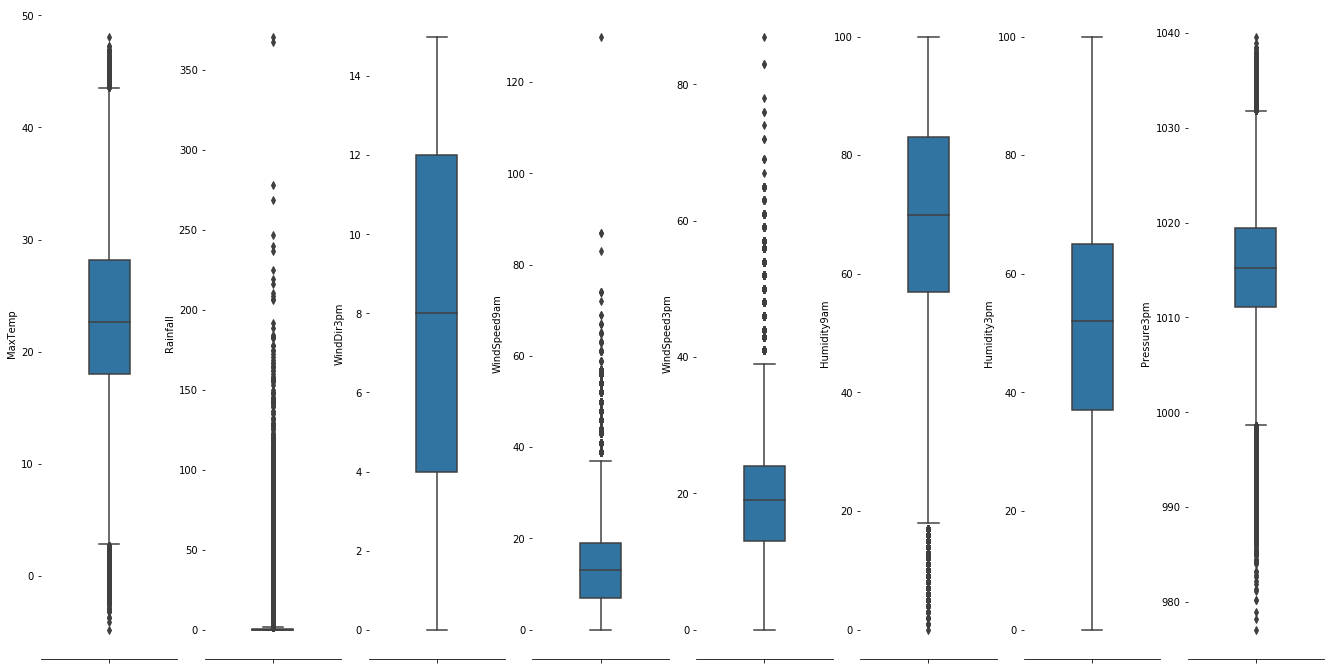

In [17]:
# Lets plot Boxplot for Every column
# set up the axes of subplot:
f,ax = plt.subplots(1,8, figsize=(23,12))
sns.despine(left=True)
cols=['MaxTemp','Rainfall','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm']
sns.boxplot(cols[0],data=train,orient='v',ax=ax[0],width=0.3)
sns.boxplot(cols[1],data=train,orient='v',ax=ax[1],width=0.3)
sns.boxplot(cols[2],data=train,orient='v',ax=ax[2],width=0.3)
sns.boxplot(cols[3],data=train,orient='v',ax=ax[3],width=0.3)
sns.boxplot(cols[4],data=train,orient='v',ax=ax[4],width=0.3)
sns.boxplot(cols[5],data=train,orient='v',ax=ax[5],width=0.3)
sns.boxplot(cols[6],data=train,orient='v',ax=ax[6],width=0.3)
sns.boxplot(cols[7],data=train,orient='v',ax=ax[7],width=0.3)
plt.show()

In [20]:
# Checking if there is any duplicate record for the same song
data_no_dupl = train.drop_duplicates()

In [21]:
# Treating Outliers for Pressure3pm:
Q1 = data_no_dupl.Pressure3pm.quantile(0.05)
Q3 = data_no_dupl.Pressure3pm.quantile(0.95)

IQR = Q3 - Q1
data_no_dupl = data_no_dupl[(data_no_dupl.Pressure3pm>=Q1 - 1.5*IQR)&(data_no_dupl.Pressure3pm<=Q3 + 1.5*IQR)]

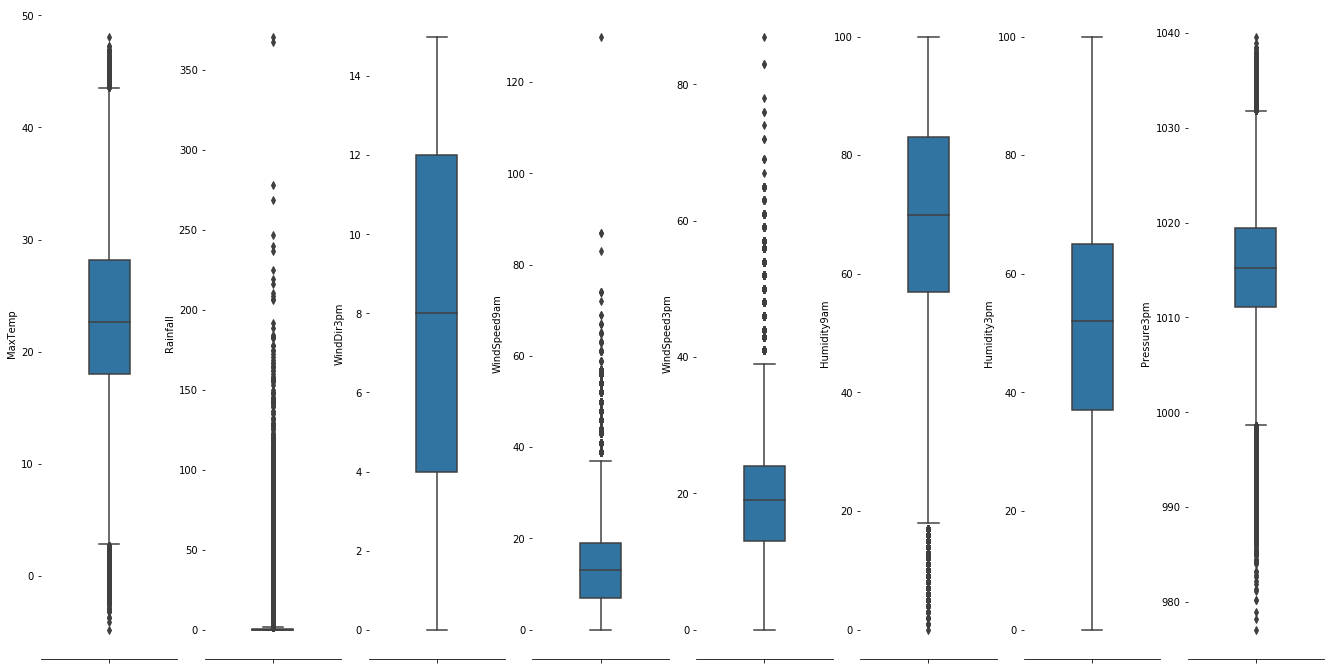

In [22]:
# Lets plot Boxplot for Every column
# set up the axes of subplot:
f,ax = plt.subplots(1,8, figsize=(23,12))
sns.despine(left=True)
cols=['MaxTemp','Rainfall','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm']
sns.boxplot(cols[0],data=data_no_dupl,orient='v',ax=ax[0],width=0.3)
sns.boxplot(cols[1],data=data_no_dupl,orient='v',ax=ax[1],width=0.3)
sns.boxplot(cols[2],data=data_no_dupl,orient='v',ax=ax[2],width=0.3)
sns.boxplot(cols[3],data=data_no_dupl,orient='v',ax=ax[3],width=0.3)
sns.boxplot(cols[4],data=data_no_dupl,orient='v',ax=ax[4],width=0.3)
sns.boxplot(cols[5],data=data_no_dupl,orient='v',ax=ax[5],width=0.3)
sns.boxplot(cols[6],data=data_no_dupl,orient='v',ax=ax[6],width=0.3)
sns.boxplot(cols[7],data=data_no_dupl,orient='v',ax=ax[7],width=0.3)
plt.show()

In [23]:
# Dropping outlier values by z score
print('Shape of DataFrame Before Removing Outliers', train.shape )
train=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', train.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (138208, 22)


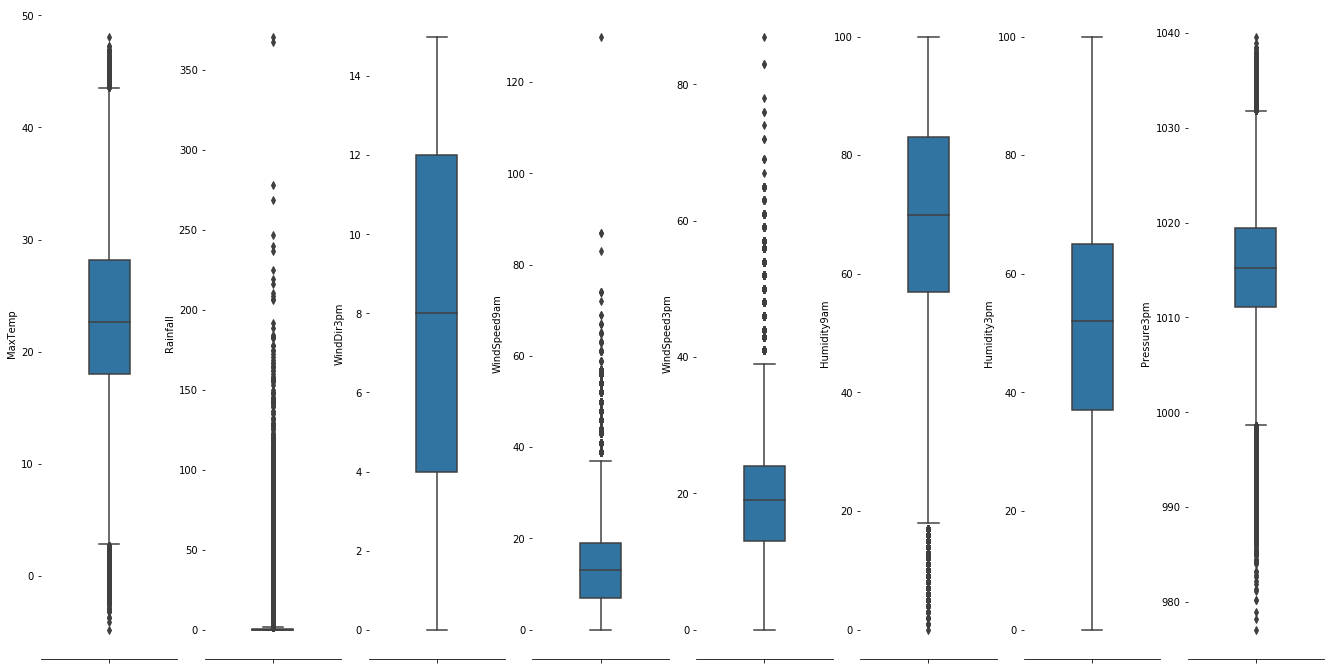

In [24]:
# From the third plot(Monetary Value), extreme skewness can be seen. Need to be treated. Lets plot Boxplot for each
# set up the axes of subplot:
f,ax = plt.subplots(1,8, figsize=(23,12))
sns.despine(left=True)
cols=['MaxTemp','Rainfall','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm']
sns.boxplot(cols[0],data=data_no_dupl,orient='v',ax=ax[0],width=0.3)
sns.boxplot(cols[1],data=data_no_dupl,orient='v',ax=ax[1],width=0.3)
sns.boxplot(cols[2],data=data_no_dupl,orient='v',ax=ax[2],width=0.3)
sns.boxplot(cols[3],data=data_no_dupl,orient='v',ax=ax[3],width=0.3)
sns.boxplot(cols[4],data=data_no_dupl,orient='v',ax=ax[4],width=0.3)
sns.boxplot(cols[5],data=data_no_dupl,orient='v',ax=ax[5],width=0.3)
sns.boxplot(cols[6],data=data_no_dupl,orient='v',ax=ax[6],width=0.3)
sns.boxplot(cols[7],data=data_no_dupl,orient='v',ax=ax[7],width=0.3)
plt.show()

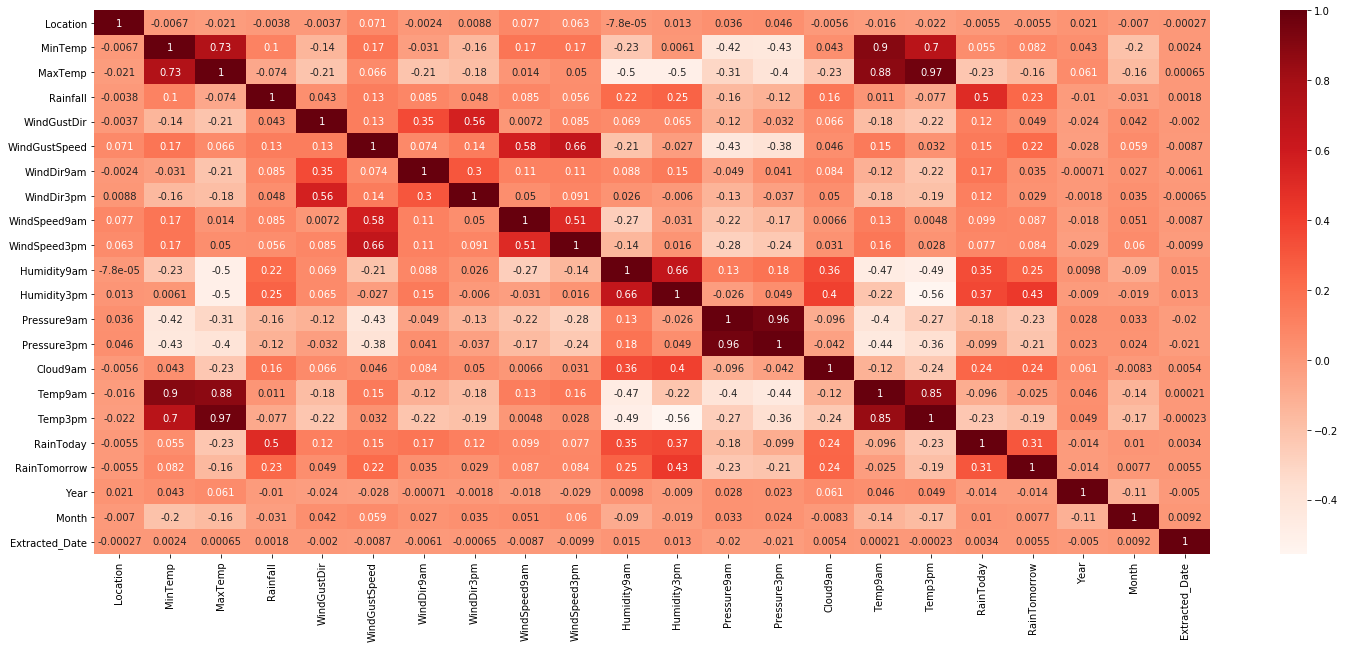

In [26]:
# Plotting Correlation Matrix to check highly dependant variables.
corrMatrix = data_no_dupl.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Reds')
plt.rcParams["figure.figsize"] = (25,10)
plt.show()

In [27]:
# Dropping Highy correlated columns
data_no_dupl.drop(['MinTemp', 'Temp3pm', 'Temp9am','WindGustSpeed', 'Pressure9am'], axis = 1, inplace = True)

In [28]:
X  =  data_no_dupl[['Location','MaxTemp','Rainfall','WindGustDir','WindDir9am',
                    'WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm','Cloud9am',
                    'RainToday','Year','Month','Extracted_Date']]
y = data_no_dupl[['RainTomorrow']]

## Logistic Regression

In [29]:
# Evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
score_precision = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print('Precision: %.3f (%.3f)' % (mean(score_precision), std(score_precision)))

Accuracy: 0.833 (0.004)
Precision: 0.702 (0.017)


## Gradient Boosting Classifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116368, 16) (29092, 16) (116368, 1) (29092, 1)


In [31]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train.values.ravel())
#.values will give the values in an array and .ravel will convert that array shape to (n, )

clf_predicted = clf.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  21623
False Positives:  1158
False Negatives:  3360
True Positives:  2951


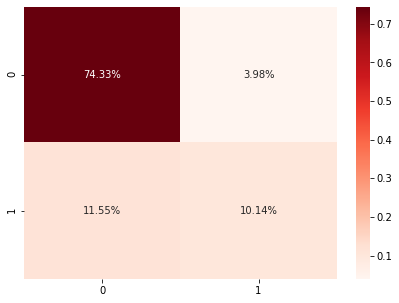

In [33]:
data = [[tn, fp],[fn, tp]]
plt.rcParams["figure.figsize"] = (7,5)
sns.heatmap(data/np.sum(data), annot=True, 
            fmt='.2%', cmap='Reds')
plt.show()

In [39]:
from sklearn.metrics import f1_score
print("The accuracy of Gradient Boosting Classifier model is : ", accuracy_score(y_test, clf_predicted)*100, "%")
print("F1 score for Gradient Boosting Classifier is :",f1_score(y_test, clf_predicted,)*100, "%")
Precision = (tp/(tp+fp))*100
print("Precision for Gradient Boosting Classifier is :{:0.2f}".format(Precision),"%")
Recall = (tp/(tp+fn))*100
print("Recall for Gradient Boosting Classifier is :{:0.2f}".format(Recall), "%")

The accuracy of Gradient Boosting Classifier model is :  84.46995737659839 %
F1 score for Gradient Boosting Classifier is : 56.64107485604606 %
Precision for Gradient Boosting Classifier is :71.82 %
Recall for Gradient Boosting Classifier is :46.76 %


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22781
         1.0       0.72      0.47      0.57      6311

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [43]:
import sklearn.metrics as metrics
print("The accuracy of Random Forest model is : ", accuracy_score(y_test, y_pred)*100, "%")
print()
print("F1 score for Random Forest is :",f1_score(y_test, y_pred,)*100, "%")

The accuracy of Random Forest model is :  85.09212154544204 %

F1 score for Random Forest is : 58.326126645527054 %


In [44]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  21720
False Positives:  1061
False Negatives:  3276
True Positives:  3035


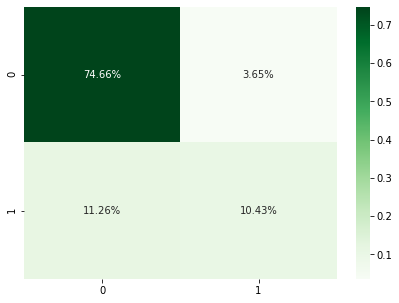

In [45]:
data = [[tn, fp],[fn, tp]]
plt.rcParams["figure.figsize"] = (7,5)
sns.heatmap(data/np.sum(data), annot=True, 
            fmt='.2%', cmap='Greens')
plt.show()

In [46]:
print("The accuracy of Random Forest model is : ", accuracy_score(y_test, y_pred)*100, "%")
print("F1 score for Random Forest is :",f1_score(y_test, y_pred,)*100, "%")
Precision = (tp/(tp+fp))*100
print("Precision for Random Forest is :{:0.2f}".format(Precision),"%")
Recall = (tp/(tp+fn))*100
print("Recall for Random Forest is :{:0.2f}".format(Recall), "%")

The accuracy of Random Forest model is :  85.09212154544204 %
F1 score for Random Forest is : 58.326126645527054 %
Precision for Random Forest is :74.10 %
Recall for Random Forest is :48.09 %


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22781
         1.0       0.74      0.48      0.58      6311

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



## ROC Graph

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.869
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.855


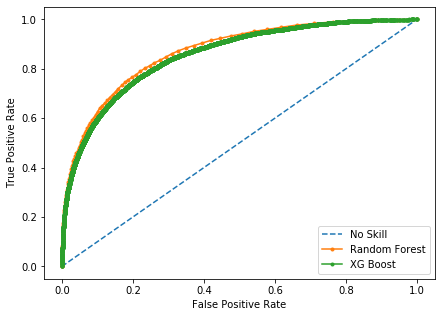

In [49]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

 
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

model = GradientBoostingClassifier()
model.fit(X_train, y_train.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XG Boost')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()